In [64]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.stats import mannwhitneyu

In [38]:
meta = pd.read_csv('../runs_meta.csv').set_index('ID')

meta

,Name,learning_rate,Group,State,Created,Runtime,lasttest_ps_MAE,besttest_ps_MAE
ID,,,,,,,,
3t837lv4,woven-dragon-708,0.00100,UNet,finished,2023-05-03T22:09:36.000Z,4136,3.064572,3.048113
1ctl0ftl,star-fighter-721,0.00010,ResNet,finished,2023-05-04T12:15:30.000Z,8068,3.202296,3.153006
39xzp979,star-federation-735,0.00010,ResNet+ImageNet,finished,2023-05-05T02:55:08.000Z,5265,3.241608,3.124928
9gpwvep1,sith-destroyer-734,0.00010,ResNet+ImageNet,finished,2023-05-05T01:26:57.000Z,5281,3.202856,3.202856
2iz21q1w,scruffy-looking-parsec-732,0.00010,ResNet+BraTS,finished,2023-05-04T22:41:12.000Z,4656,3.119652,3.146247
245vxjdw,scruffy-looking-carrier-740,0.00001,ResNet+ImageNet+BraTS,finished,2023-05-05T10:21:48.000Z,5393,3.236107,3.205109
3g343thx,rebel-emperor-722,0.00010,ResNet+BraTS,finished,2023-05-04T14:30:24.000Z,4807,3.116439,3.116439
2kawrnhu,mythical-destroyer-725,0.00010,ResNet+BraTS,finished,2023-05-04T18:30:16.000Z,4768,3.149694,3.149694
268kx27i,light-tie-fighter-723,0.00010,ResNet+BraTS,finished,2023-05-04T15:50:58.000Z,4715,3.189040,3.173770


In [4]:
for run_id, run in tqdm(list(meta.iterrows())):
    group = run.Group
    model = group.split('+')[0]

    if group.startswith('val_'):
        model = model[len('val_'):]
        !python ../model_predict.py {model} {run_id} val

    !python ../model_predict.py {model} {run_id} test

  0%|          | 0/60 [00:00<?, ?it/s]

Python-dotenv could not parse statement starting at line 6
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 11
Python-dotenv could not parse statement starting at line 12


Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

100%|█████████████████████████████████████████| 770/770 [01:19<00:00,  9.74it/s]
Python-dotenv could not parse statement starting at line 6
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 11
Python-dotenv could not

In [39]:
from pathlib import Path

got_files = list()
for run_id, _ in meta.iterrows():
    files = list(Path('../data/preds/').glob(f'predictions_*{run_id}_test.pkl'))
    got_files.append(len(files) > 0)

all(got_files)

True

In [40]:
got_val_files = list()
for run_id, run in meta.iterrows():
    if run.Group.startswith('val_'):
        files = list(Path('../data/preds/').glob(f'predictions_*{run_id}_val.pkl'))
        got_val_files.append(len(files) > 0)

all(got_val_files)

True

In [47]:
def get_stats(preds):
    age_hats = np.array(preds['age_hats'])
    ages = np.array(preds['ages'])
    groups = np.array(preds['groups'])

    deltas = age_hats - ages

    cn = deltas[groups == 'CN']
    mci = deltas[groups == 'MCI']
    ad = deltas[groups == 'AD']

    cn_mci_pvalue = mannwhitneyu(cn, mci).pvalue
    cn_ad_pvalue = mannwhitneyu(cn, ad).pvalue
    mci_ad_pvalue = mannwhitneyu(mci, ad).pvalue
    cn_mean = cn.mean()
    mci_mean = mci.mean()
    ad_mean = ad.mean()
    
    return cn_mci_pvalue, cn_ad_pvalue, mci_ad_pvalue, cn_mean, mci_mean, ad_mean


statistics = list()
for run_id, run in meta.iterrows():
    test_predictions_fpath = next(Path('../data/preds/').glob(f'predictions_*{run_id}_test.pkl'))
    with open(test_predictions_fpath, 'rb') as f:
        test_predictions = pickle.load(f)
        
    (cn_mci_pvalue, cn_ad_pvalue, mci_ad_pvalue,
     cn_mean, mci_mean, ad_mean) = get_stats(test_predictions)
    
    if run.Group.startswith('val'):
        val_predictions_fpath = next(Path('../data/preds/').glob(f'predictions_*{run_id}_val.pkl'))
        with open(val_predictions_fpath, 'rb') as f:
            val_predictions = pickle.load(f)

        (val_cn_mci_pvalue, val_cn_ad_pvalue, val_mci_ad_pvalue,
         val_cn_mean, val_mci_mean, val_ad_mean) = get_stats(val_predictions)
    else:
        (val_cn_mci_pvalue, val_cn_ad_pvalue, val_mci_ad_pvalue,
         val_cn_mean, val_mci_mean, val_ad_mean) = (np.nan,) * 6

    statistics.append(dict(
        test_cn_mci_pvalue=cn_mci_pvalue,
        test_cn_ad_pvalue=cn_ad_pvalue,
        test_mci_ad_pvalue=mci_ad_pvalue,
        test_cn_mean=cn_mean,
        test_mci_mean=mci_mean,
        test_ad_mean=ad_mean,
        val_cn_mci_pvalue=val_cn_mci_pvalue,
        val_cn_ad_pvalue=val_cn_ad_pvalue,
        val_mci_ad_pvalue=val_mci_ad_pvalue,
        val_cn_mean=val_cn_mean,
        val_mci_mean=val_mci_mean,
        val_ad_mean=val_ad_mean,
    ))

In [106]:
df_stats = pd.DataFrame(statistics)
df_stats.index = meta.index
df_stats
df = pd.concat((meta, df_stats), axis=1)

(df['test_mci_mean'] > df['test_cn_mean']).all(), (df['test_ad_mean'] > df['test_mci_mean']).all()

(True, True)

In [56]:
df.groupby('Group')['test_cn_mci_pvalue', 'test_cn_ad_pvalue', 'test_mci_ad_pvalue'].agg([np.mean, np.max])

/opt/conda/envs/bruno/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


test_cn_mci_pvalue               test_cn_ad_pvalue  \
                                        mean          amax              mean   
Group                                                                          
ResNet                          1.203655e-05  2.817141e-05      4.009478e-05   
ResNet+BraTS                    4.182502e-06  8.062577e-06      5.215675e-05   
ResNet+ImageNet                 1.870975e-05  4.230140e-05      4.646567e-05   
ResNet+ImageNet+BraTS           4.857980e-05  1.042352e-04      4.314863e-04   
UNet                            3.758797e-08  8.399532e-08      8.259184e-08   
UNet+BraTS                      3.819424e-07  6.793615e-07      2.141319e-06   
val_ResNet                      3.286836e-07  7.098343e-07      1.447140e-07   
val_ResNet+BraTS                4.972245e-08  1.516285e-07      1.386585e-08   
val_ResNet+ImageNet             1.009084e-07  2.837952e-07      1.895733e-07   
val_ResNet+ImageNet+BraTS       6.423490e-06  1.377889e-05      1.074387e-05   
val_UNet                        1.612831e-11  3.300770e-11      1.404699e-11   
val_UNet+BraTS                  1.799865e-11  6.634966e-11      2.300075e-11   

                                        test_mci_ad_pvalue            
                                   amax               mean      amax  
Group                                                                 
ResNet                     1.022668e-04           0.192748  0.245228  
ResNet+BraTS               9.381232e-05           0.261464  0.297705  
ResNet+ImageNet            1.033725e-04           0.177240  0.230923  
ResNet+ImageNet+BraTS      7.962486e-04           0.344824  0.389968  
UNet                       1.547301e-07           0.091358  0.107235  
UNet+BraTS                 3.686966e-06           0.189726  0.213163  
val_ResNet                 5.607140e-07           0.046476  0.071395  
val_ResNet+BraTS           3.805286e-08           0.051291  0.088851  
val_ResNet+ImageNet        8.524637e-07           0.063072  0.111730  
val_ResNet+ImageNet+BraTS  2.725670e-05           0.171290  0.224913  
val_UNet                   5.860042e-11           0.025345  0.052621  
val_UNet+BraTS             8.731714e-11           0.035719  0.049373

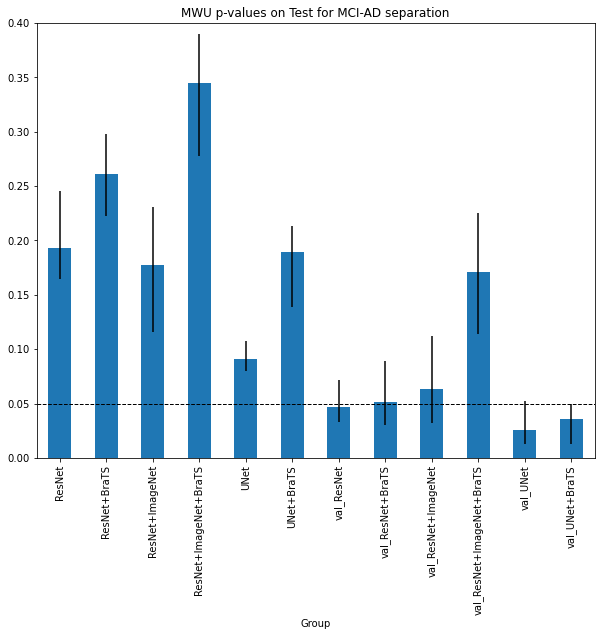

In [107]:
bar_value = df.groupby('Group')['test_mci_ad_pvalue'].mean()
yerr_bot = bar_value - df.groupby('Group')['test_mci_ad_pvalue'].min()
yerr_top = df.groupby('Group')['test_mci_ad_pvalue'].max() - bar_value
yerr = list(zip(yerr_bot.values, yerr_top.values))
# plt.bar(bar_value.index, bar_value.values)
# plt.plot()
bar_value.plot.bar(yerr=np.array(yerr).T)
# plt.yscale('log')
plt.axhline(y=0.05, linestyle='--', color='black', linewidth=1, label='5%')
# plt.legend()
plt.ylim(0,.4)
plt.title('MWU p-values on Test for MCI-AD separation')
plt.gcf().set_size_inches((10,8))

In [55]:
df.groupby('Group')['val_cn_mci_pvalue', 'val_cn_ad_pvalue', 'val_mci_ad_pvalue'].agg([np.mean, np.max])

/opt/conda/envs/bruno/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


val_cn_mci_pvalue           val_cn_ad_pvalue  \
                                       mean      amax             mean   
Group                                                                    
ResNet                                  NaN       NaN              NaN   
ResNet+BraTS                            NaN       NaN              NaN   
ResNet+ImageNet                         NaN       NaN              NaN   
ResNet+ImageNet+BraTS                   NaN       NaN              NaN   
UNet                                    NaN       NaN              NaN   
UNet+BraTS                              NaN       NaN              NaN   
val_ResNet                         0.008158  0.013832     1.453434e-04   
val_ResNet+BraTS                   0.006066  0.008133     7.310514e-05   
val_ResNet+ImageNet                0.011564  0.015763     1.610612e-04   
val_ResNet+ImageNet+BraTS          0.037861  0.065151     2.242360e-03   
val_UNet                           0.000282  0.000665     2.578113e-07   
val_UNet+BraTS                     0.000098  0.000236     4.966990e-07   

                                        val_mci_ad_pvalue            
                                   amax              mean      amax  
Group                                                                
ResNet                              NaN               NaN       NaN  
ResNet+BraTS                        NaN               NaN       NaN  
ResNet+ImageNet                     NaN               NaN       NaN  
ResNet+ImageNet+BraTS               NaN               NaN       NaN  
UNet                                NaN               NaN       NaN  
UNet+BraTS                          NaN               NaN       NaN  
val_ResNet                 2.491621e-04          0.050616  0.066102  
val_ResNet+BraTS           1.439377e-04          0.050662  0.064446  
val_ResNet+ImageNet        2.569010e-04          0.043719  0.055055  
val_ResNet+ImageNet+BraTS  4.944706e-03          0.094542  0.109576  
val_UNet                   9.561790e-07          0.010971  0.017251  
val_UNet+BraTS             2.470050e-06          0.010768  0.035458

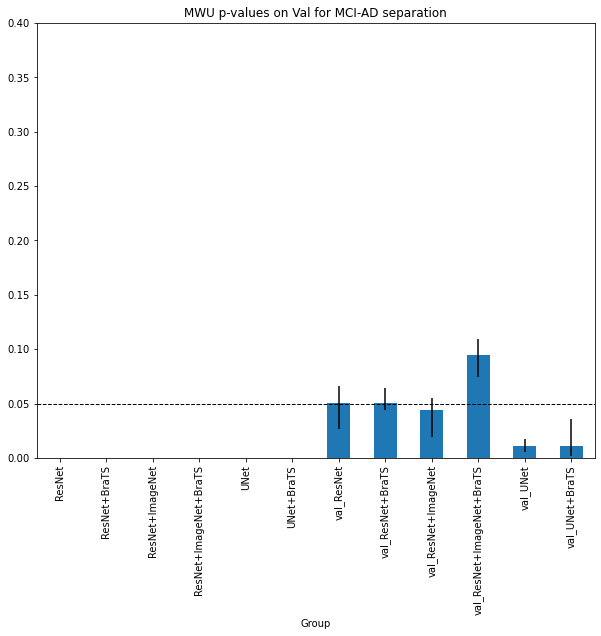

In [108]:
bar_value = df.groupby('Group')['val_mci_ad_pvalue'].mean()
yerr_bot = bar_value - df.groupby('Group')['val_mci_ad_pvalue'].min()
yerr_top = df.groupby('Group')['val_mci_ad_pvalue'].max() - bar_value
yerr = list(zip(yerr_bot.values, yerr_top.values))
# plt.bar(bar_value.index, bar_value.values)
# plt.plot()
bar_value.plot.bar(yerr=np.array(yerr).T)
# plt.yscale('log')
plt.axhline(y=0.05, linestyle='--', color='black', linewidth=1, label='5%')
# plt.legend()
plt.ylim(0,.4)
plt.title('MWU p-values on Val for MCI-AD separation')
plt.gcf().set_size_inches((10,8))